In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# from statannotations.Annotator import Annotator

import json

In [3]:
cartography_df = pd.read_csv('./results/full_cartography.csv')
cartography_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,majority_label,confidence,variability,correctness,is_correct,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
0,0,519,"<user> <user> Sorry, which old man?",0.909335,0.087134,0.977597,0.090665,0.087134,0.022403,0,...,0,0.909335,0.087134,0.977597,True,1.0,1.0,False,0.960451,0.046082
1,4,519,"<user> <user> Sorry, which old man?",0.935822,0.077746,0.998418,0.064178,0.077746,0.001582,0,...,0,0.935822,0.077746,0.998418,True,1.0,1.0,False,0.960451,0.046082
2,158,519,"<user> <user> Sorry, which old man?",0.964263,0.048459,0.996545,0.035737,0.048459,0.003455,0,...,0,0.964263,0.048459,0.996545,True,1.0,1.0,False,0.960451,0.046082
3,303,519,"<user> <user> Sorry, which old man?",0.982817,0.014302,0.997595,0.017183,0.014302,0.002405,0,...,0,0.982817,0.014302,0.997595,True,1.0,1.0,False,0.960451,0.046082
4,402,519,"<user> <user> Sorry, which old man?",0.949519,0.093693,0.997699,0.050481,0.093693,0.002301,0,...,0,0.949519,0.093693,0.997699,True,1.0,1.0,False,0.960451,0.046082


In [5]:
both_votes_df = cartography_df[cartography_df['agreement_factor'] < 1.0].copy()
both_votes_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,majority_label,confidence,variability,correctness,is_correct,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
10,0,679,<user> <user> <user> President Trump spent his...,0.296290,0.195163,0.276914,0.703710,0.195163,0.723086,1,...,1,0.703710,0.195163,0.723086,True,0.6,0.6,False,0.805419,0.236047
11,2,679,<user> <user> <user> President Trump spent his...,0.661447,0.112500,0.637540,0.338553,0.112500,0.362460,0,...,1,0.661447,0.112500,0.637540,True,0.6,0.6,True,0.805419,0.236047
12,7,679,<user> <user> <user> President Trump spent his...,0.252828,0.141591,0.111033,0.747172,0.141591,0.888967,1,...,1,0.747172,0.141591,0.888967,True,0.6,0.6,False,0.805419,0.236047
13,22,679,<user> <user> <user> President Trump spent his...,0.637383,0.143021,0.733126,0.362617,0.143021,0.266874,1,...,1,0.362617,0.143021,0.266874,False,0.6,0.6,False,0.805419,0.236047
14,148,679,<user> <user> <user> President Trump spent his...,0.693151,0.083711,0.652475,0.306849,0.083711,0.347525,0,...,1,0.693151,0.083711,0.652475,True,0.6,0.6,True,0.805419,0.236047


In [30]:
cartography_df['Mindex'].nunique()

8357

In [17]:
both_votes_df[both_votes_df['Mindex'] == 679][['confidence', 'text', 'Aindex', 'pred', 'label']].values

array([[0.7037100851535797,
        '<user> <user> <user> President Trump spent his life working hard to make things great for his Family &amp; gave it up to work hard for ALL AMERICANS. joe-kickback-biden bullshitted his way into public office so he could use his influence to enrich himself &amp; his family at the American tax payers expense!',
        0, 1, 1],
       [0.6614466428756713,
        '<user> <user> <user> President Trump spent his life working hard to make things great for his Family &amp; gave it up to work hard for ALL AMERICANS. joe-kickback-biden bullshitted his way into public office so he could use his influence to enrich himself &amp; his family at the American tax payers expense!',
        2, 0, 0],
       [0.747172474861145,
        '<user> <user> <user> President Trump spent his life working hard to make things great for his Family &amp; gave it up to work hard for ALL AMERICANS. joe-kickback-biden bullshitted his way into public office so he could use his infl

In [14]:
both_votes_df[both_votes_df['Aindex'] == 0][['confidence', 'text', 'pred', 'label']].values

array([[0.7037100851535797,
        '<user> <user> <user> President Trump spent his life working hard to make things great for his Family &amp; gave it up to work hard for ALL AMERICANS. joe-kickback-biden bullshitted his way into public office so he could use his influence to enrich himself &amp; his family at the American tax payers expense!',
        1, 1],
       [0.8815631747245789,
        '<user> <user> Lol. Y’all’s are probably one of them. Proud Boys are a racist neo nazi dangerous white Supremacist group. I’m done cause it’s obvious you are clueless. Watch their videos and read their quotes.',
        1, 1],
       [0.3139286592602729,
        '<user> #sleepingjoe cry no more 😂😂😂 you so awful😂', 0, 1],
       [0.5127638399600982,
        '<user> <user> <user> If you classify restraint as calling your opponent a clown a racist and telling him to shut up sure.',
        0, 0],
       [0.7718652427196503,
        'Bye Martha McSally!   I always found her unbelievably smug and sp

In [36]:
grouped_data_label = both_votes_df.groupby(['Mindex', 'label']).agg({'confidence': 'mean'}).reset_index()
grouped_data_label = grouped_data_label.pivot(index='Mindex', columns='label', values='confidence').reset_index()
grouped_data_label.rename(columns={0: 'label_0', 1: 'label_1', 'label': 'index'}, inplace=True)
grouped_data_label.head()

label,Mindex,label_0,label_1
0,2,0.757111,0.020271
1,5,0.749879,0.541777
2,8,0.794425,0.177775
3,13,0.504937,0.745088
4,15,0.606738,0.557554


In [37]:
grouped_data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857 entries, 0 to 4856
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mindex   4857 non-null   int64  
 1   label_0  4857 non-null   float64
 2   label_1  4857 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 114.0 KB


In [38]:
both_greater = len(grouped_data_label[(grouped_data_label['label_0'] > 0.5) & (grouped_data_label['label_1'] > 0.5)])
only_0_greater = len(grouped_data_label[(grouped_data_label['label_0'] > 0.5) & (grouped_data_label['label_1'] <= 0.5)])
only_1_greater = len(grouped_data_label[(grouped_data_label['label_0'] <= 0.5) & (grouped_data_label['label_1'] > 0.5)])
none_greater = len(grouped_data_label[(grouped_data_label['label_0'] <= 0.5) & (grouped_data_label['label_1'] <= 0.5)])
both_greater, only_0_greater, only_1_greater, none_greater

(2009, 2025, 735, 88)

<Axes: >

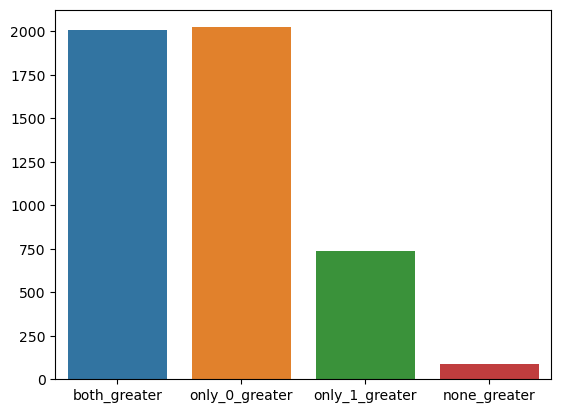

In [39]:
sns.barplot(x=['both_greater', 'only_0_greater', 'only_1_greater', 'none_greater'], y=[both_greater, only_0_greater, only_1_greater, none_greater])